From this article, we will learn how to use Machine Learning Linear Regression Model to predict the price of one of the most used Chemical elements by Nuclear power plants called Uranium. In this project, we are using Uranium Energy Corp. (UEC) dataset.
(https://finance.yahoo.com/quote/UEC?p=UEC&.tsrc=fin-srch.)
# **Table of Contents**
Import all the necessary libraries
Bollinger Band
Define Independent Variable and Dependent Variable
Split the data into train and test dataset
Create a Multivariate Linear Regression Model
Predict the UEC prices
Performance Matrices 

# **Introduction**

We can define linear regression as it is used for learning the linear relationship between the target and one or more forecasters (In Leyman’s term).
Linear regression attempts to exhibit the connection between two variables by fitting a linear equation to audited information. One variable is observed as an “Independent variable”, and the other is observed as a “Dependent variable”.

**Types of Linear Regression**

Normally, linear regression is categorized into two types:

Simple Linear Regression

Multiple Linear Regression

**Multiple Linear Regression**

From this type of linear regression, we always can see the relationship between two or more independent variables and the corresponding dependent variable and the independent variables can be either “Continuous” or “Categorical”.
This linear regression analysis is very helpful in several ways like it helps in forecasting, future values etc. In this article, we will use this model in our case.

# **Import all the necessary libraries**

First we have to import all the necessary libraries which are required for this project. Because of using YahooFinance as our data source platform , we have to install it first.


In [ ]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.4 MB 7.3 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=521232d528f171f0829bbe6f7d175338f72a3f1540660471a14dc7a4d97c1fea
  Stored in directory: /root/.cache/pip/wheels/4b

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error, r2_score


Then we have to read the past 10 years of daily Uranium(UEC) data and store it in dataframe. We will remove the NaN values using dropna() function. Then, we will plot the UEC Close price.

[*********************100%***********************]  1 of 1 completed


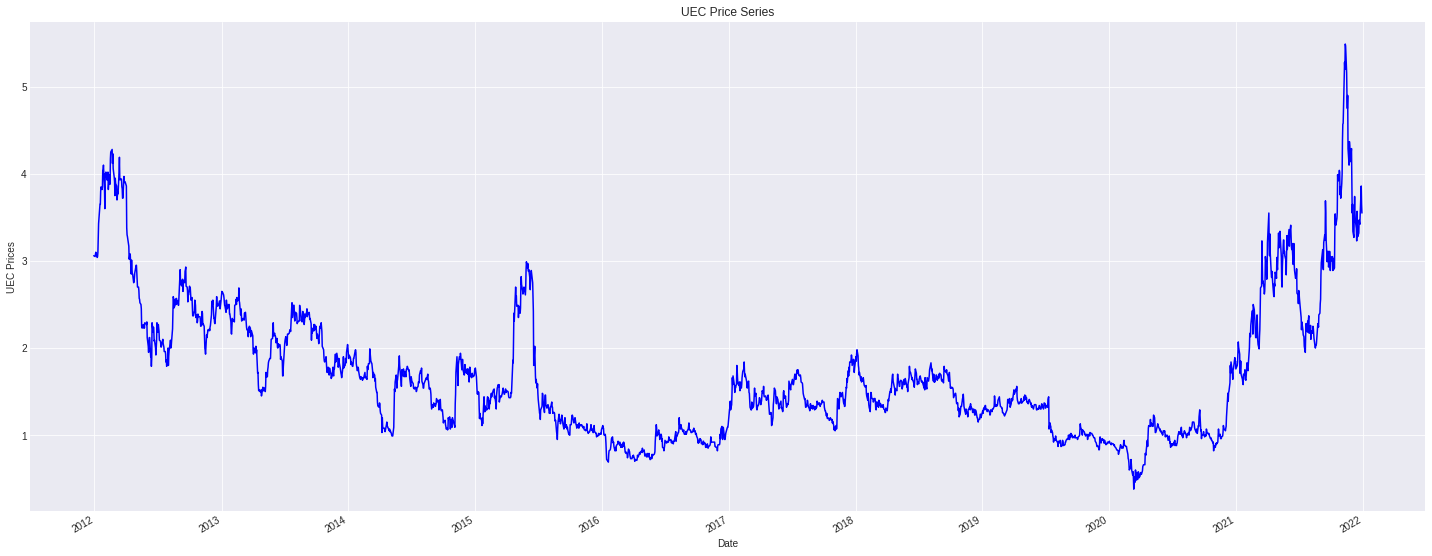

In [ ]:
Df = yf.download('UEC', '2011-12-30', '2021-12-30', auto_adjust=True)
Df = Df.dropna()

Df.Close.plot(figsize=(25,10),color='b')
plt.ylabel("UEC Prices")
plt.title("UEC Price Series")
plt.show()

In [ ]:
Df = Df[['Close']]

# **Bollinger Band**
Now that we have our closing prices in a Pandas DataFrame, we can move to calculate the Standard Daviation, Moving Average for finding Upper Bollinger band and Lower Bollinger band. After that we will show the graphical presentation of Bollinger Band with respect to Close price.

In [ ]:
Df['std'] = Df['Close'].rolling(window=20).std(ddof=0) 
Df['MA'] = Df['Close'].rolling(window=20).mean()
Df['BB_Up'] = Df['MA'] + 2*Df['std']
Df['BB_Down'] = Df['MA'] - 2*Df['std'] 
Df.head(25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Close,std,MA,BB_Up,BB_Down
Date,,,,,
2011-12-30,3.06,NaN,NaN,NaN,NaN
2012-01-03,3.05,NaN,NaN,NaN,NaN
2012-01-04,3.08,NaN,NaN,NaN,NaN
2012-01-05,3.10,NaN,NaN,NaN,NaN
2012-01-06,3.08,NaN,NaN,NaN,NaN
2012-01-09,3.04,NaN,NaN,NaN,NaN
2012-01-10,3.05,NaN,NaN,NaN,NaN
2012-01-11,3.10,NaN,NaN,NaN,NaN
2012-01-12,3.27,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Price')

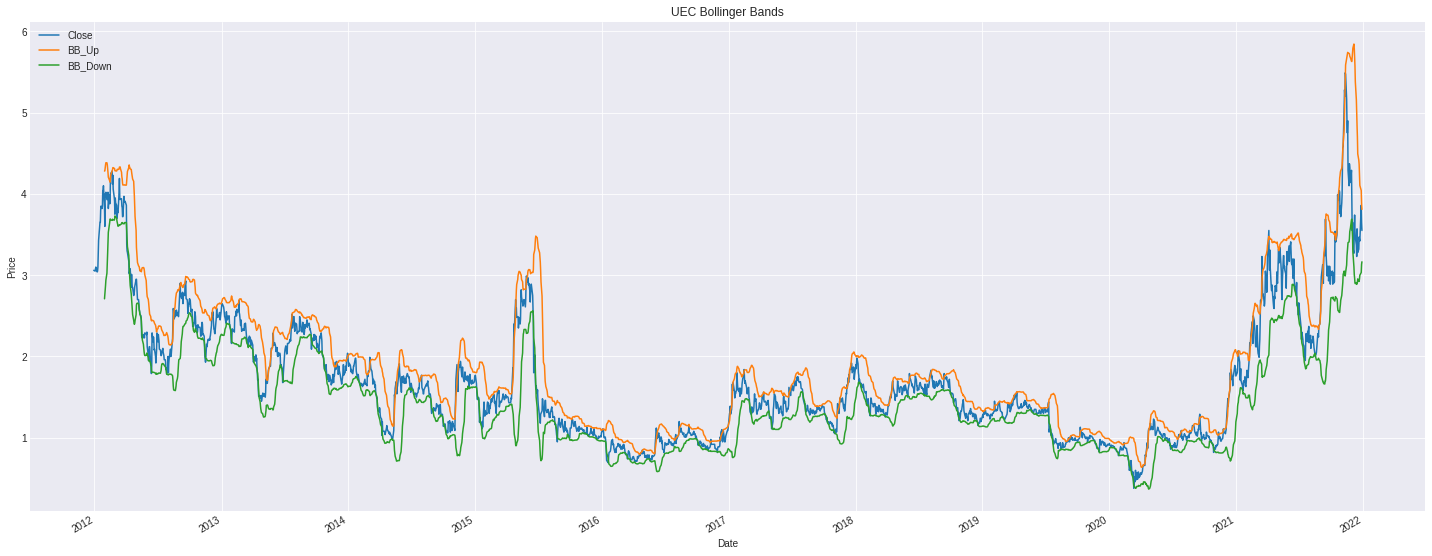

In [ ]:
df=Df[['Close', 'BB_Up', 'BB_Down']].plot(figsize=(25,10))
plt.grid(True)
plt.title('UEC Bollinger Bands')
plt.axis('tight')
plt.ylabel('Price')

# **Define Independent Variable and Dependent Variable**
An independent variable is a variable that is manipulated to determine the value of the UEC price the next day or something. Easily, they are the features which we want to use to predict the UEC price.

The independent variables in this project are the moving averages for past 3 days and 9 days.We store the feature variables in X. However, you can add more variables to X which you think are useful to predict the prices of the Uranium(UEC).


In [ ]:
Df['MA_3'] = Df['Close'].rolling(window=3).mean()
Df['MA_9'] = Df['Close'].rolling(window=9).mean()
Df['NEXT_DAY_PRICE'] = Df['Close'].shift(-1)

Df = Df.dropna()
X = Df[['MA_3', 'MA_9']]

y = Df['NEXT_DAY_PRICE']

# **Split the data into train and test dataset**
First 80% of the data is used for training and remaining 20% data for testing
X_train & y_train are training dataset
X_test & y_test are test dataset

The test data is used to estimate how well the model has been trained.

In [ ]:
t = .8
t = int(t*len(Df))

X_train = X[:t]
y_train = y[:t]

X_test = X[t:]
y_test = y[t:]

# **Create a Multivariate Linear Regression Model**

Now we create Linear Regression model for this strategy.

In [ ]:
linear = LinearRegression().fit(X_train, y_train)
print("Multivariate Linear Regression Model")
print("Uranium Price (y) = %.2f * 3 Days Moving Average(MA)) (x1) \
+ %.2f * 9 Days Moving Average(MA) (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))


Multivariate Linear Regression Model
Uranium Price (y) = 1.19 * 3 Days Moving Average(MA)) (x1) + -0.21 * 9 Days Moving Average(MA) (x2) + 0.02 (constant)


# **Predict the UEC prices**

Now we predict the prices using the linear model created using the train dataset to check if the model works in the test dataset. Besides graph shows the predicted and actual price of the Uranium (UEC) .

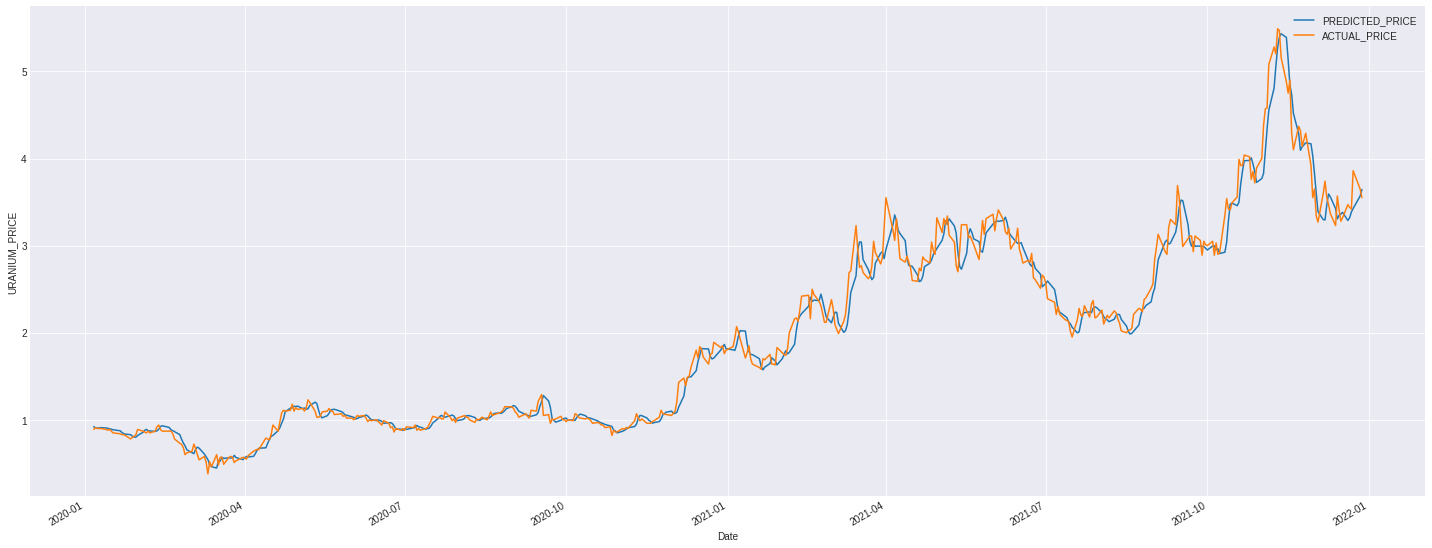

In [ ]:
PREDICTED_PRICE = linear.predict(X_test)
PREDICTED_PRICE = pd.DataFrame(
    PREDICTED_PRICE, index=y_test.index, columns=['PRICE'])
PREDICTED_PRICE.plot(figsize=(25,10))
y_test.plot()
plt.legend(['PREDICTED_PRICE', 'ACTUAL_PRICE'])
plt.ylabel("URANIUM_PRICE")
plt.show()

# **Performance Metrices**

Finally, we see a medley of metrics useful in evaluating our model’s utility.

In [ ]:
print("Mean Absolute Error:", mean_absolute_error(y_test, PREDICTED_PRICE))
print("R-Square Score:", r2_score(y_test, PREDICTED_PRICE))

Mean Absolute Error: 0.09794909267795456
R-Square Score: 0.9824633568734779
